In [220]:
%matplotlib inline
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn import tree

In [191]:
df = pd.read_csv('final_training_data.csv')
df.head()

,symptome 2,symptome 3,symptome 4,symptome 5,symptome 6,symptome 7,symptome 8,symptome 9,Sex,Age,...,Single,Widowed,Africa,Antarctica,Asia,Europe,North America,Oceania,South America,Smallpox
0,1,1,1,1,0,1,0,0,1,62,...,1,0,1,0,0,0,0,0,0,1
1,1,0,0,0,1,1,1,1,1,62,...,0,1,0,0,0,0,0,1,0,1
2,1,0,0,1,1,1,0,0,0,33,...,1,0,0,0,1,0,0,0,0,0
3,1,1,1,1,0,0,0,1,0,46,...,0,0,0,0,1,0,0,0,0,1
4,1,1,1,0,1,0,1,1,1,19,...,0,0,1,0,0,0,0,0,0,1


In [5]:
y = df.Smallpox
y

0        1
1        1
2        0
3        1
4        1
        ..
17495    1
17496    0
17497    1
17498    1
17499    1
Name: Smallpox, Length: 17500, dtype: int64

In [6]:
X = df.drop('Smallpox',axis = 1)
X

,symptome 2,symptome 3,symptome 4,symptome 5,symptome 6,symptome 7,symptome 8,symptome 9,Sex,Age,...,Married,Single,Widowed,Africa,Antarctica,Asia,Europe,North America,Oceania,South America
0,1,1,1,1,0,1,0,0,1,62,...,0,1,0,1,0,0,0,0,0,0
1,1,0,0,0,1,1,1,1,1,62,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,1,1,1,0,0,0,33,...,0,1,0,0,0,1,0,0,0,0
3,1,1,1,1,0,0,0,1,0,46,...,0,0,0,0,0,1,0,0,0,0
4,1,1,1,0,1,0,1,1,1,19,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17495,0,1,1,1,0,1,0,0,0,28,...,0,1,0,0,0,1,0,0,0,0
17496,0,1,1,0,1,0,1,1,0,51,...,0,0,1,0,0,0,1,0,0,0
17497,0,1,1,1,1,0,0,1,1,58,...,0,0,0,0,0,1,0,0,0,0
17498,0,1,1,1,0,0,0,0,0,42,...,0,0,0,1,0,0,0,0,0,0


### grid search

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf = RandomForestClassifier()

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [10, 100, 1000],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
}

# Create a grid search object
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best hyperparameters found
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


### model

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [178]:
rfc = RandomForestClassifier(max_depth= 10,
                            max_features= 'sqrt', 
                            min_samples_split= 10, 
                            n_estimators= 100)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10)

In [179]:
predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.6865714285714286


In [180]:
#recall
metrics.recall_score(y_test, predictions)

0.906021897810219

# Final predictions

In [181]:
final_df = pd.read_csv("pred_on_this.csv")
final_df.head()

,symptome 2,symptome 3,symptome 4,symptome 5,symptome 6,symptome 7,symptome 8,symptome 9,Sex,Age,...,Married,Single,Widowed,Africa,Antarctica,Asia,Europe,North America,Oceania,South America
0,0,0,1,0,1,0,0,0,1,35,...,0,0,1,1,0,0,0,0,0,0
1,1,1,1,0,1,0,0,1,0,50,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,33,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,1,1,49,...,0,0,1,0,0,0,0,0,1,0
4,1,1,1,0,1,0,0,0,1,50,...,0,1,0,0,0,1,0,0,0,0


In [182]:
final_X = final_df
final_X.head()

,symptome 2,symptome 3,symptome 4,symptome 5,symptome 6,symptome 7,symptome 8,symptome 9,Sex,Age,...,Married,Single,Widowed,Africa,Antarctica,Asia,Europe,North America,Oceania,South America
0,0,0,1,0,1,0,0,0,1,35,...,0,0,1,1,0,0,0,0,0,0
1,1,1,1,0,1,0,0,1,0,50,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,33,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,1,1,49,...,0,0,1,0,0,0,0,0,1,0
4,1,1,1,0,1,0,0,0,1,50,...,0,1,0,0,0,1,0,0,0,0


In [183]:
final_predictions = rfc.predict(final_X)

In [184]:
final_predictions_df = pd.DataFrame(final_predictions)
final_predictions_df.head()

,0
0,1
1,1
2,1
3,1
4,1


In [185]:
final_predictions_df.to_csv("final_preds.csv")

## Feature importance

In [206]:
import time
import numpy as np

start_time = time.time()
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.030 seconds


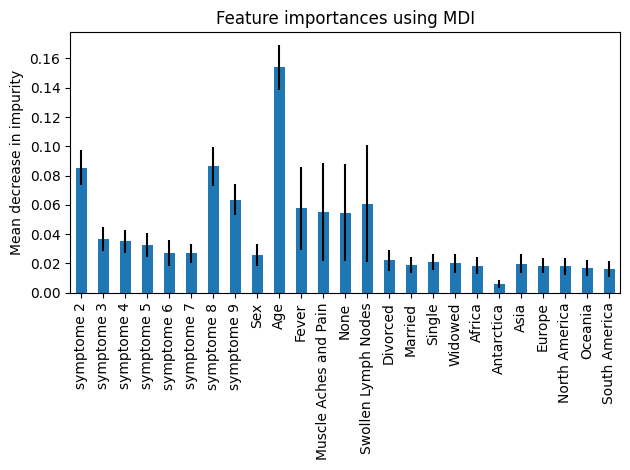

In [217]:
%matplotlib inline
import matplotlib.pyplot as plt

columns_titles = ['symptome 2',	'symptome 3',	'symptome 4',	'symptome 5',	'symptome 6',	'symptome 7',	'symptome 8',	'symptome 9',	'Sex',	'Age','Fever',	'Muscle Aches and Pain',	'None',	'Swollen Lymph Nodes',	'Divorced',	'Married',	'Single',	'Widowed','Africa'	,'Antarctica',	'Asia',	'Europe',	'North America'	,'Oceania',	'South America']
forest_importances = pd.Series(importances, index=columns_titles)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# viz 1st tree of forest

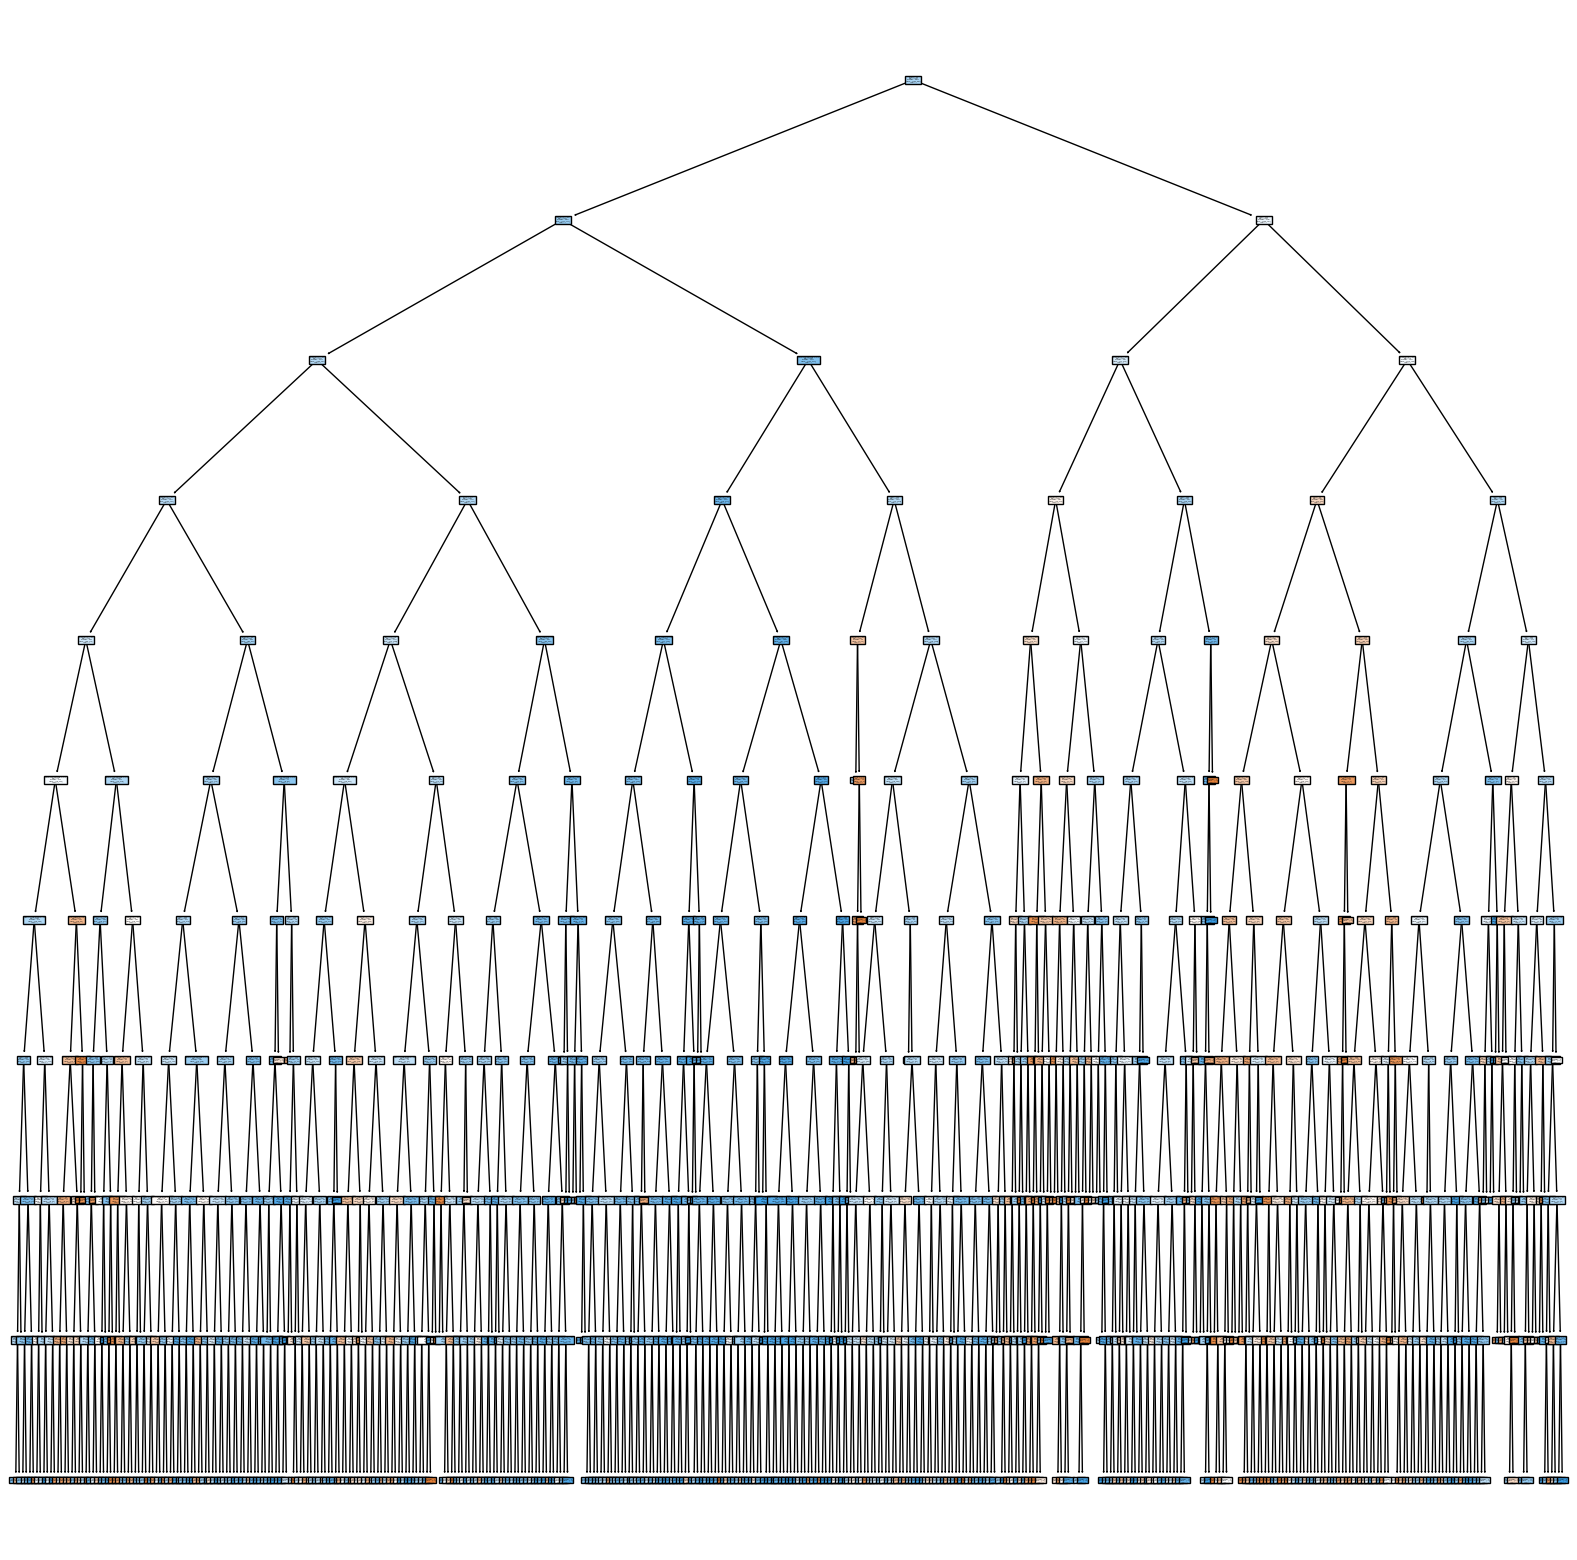

In [221]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rfc.estimators_[0],
                 
                 feature_names=columns_titles,
                 class_names=['0','1'],
                 filled=True)